# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset into pandas dataframe

In [2]:
data=pd.read_csv("loan_dataset.csv")

# Exploratory Data Analysis

In [3]:
data.shape

(116058, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  f

In [5]:
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [6]:
data.tail()


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
116053,382119962287,Y,Browning-Hart,4.125,153000,360,2012-02-01,04/2012,88,2.0,...,0,0,0,0,0,0,0,0,0,0
116054,582803915466,Z,OTHER,3.000,150000,120,2012-01-01,03/2012,35,1.0,...,0,0,0,0,0,0,0,0,0,0
116055,837922316947,X,OTHER,3.875,166000,360,2012-02-01,04/2012,58,2.0,...,0,0,0,0,0,0,0,0,0,0
116056,477343182138,X,OTHER,4.250,169000,360,2012-02-01,04/2012,74,2.0,...,0,0,0,0,0,0,0,0,0,0
116057,763308490661,Z,Thornton-Davis,3.375,252000,180,2012-01-01,03/2012,29,2.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Handling missing values

In [8]:
data.isna().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [9]:
data=data.dropna()

In [10]:
# Outliers

In [11]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [12]:
cols=data.select_dtypes(include=['int64','float64','int32'])

In [13]:
cols.columns

Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13'],
      dtype='object')

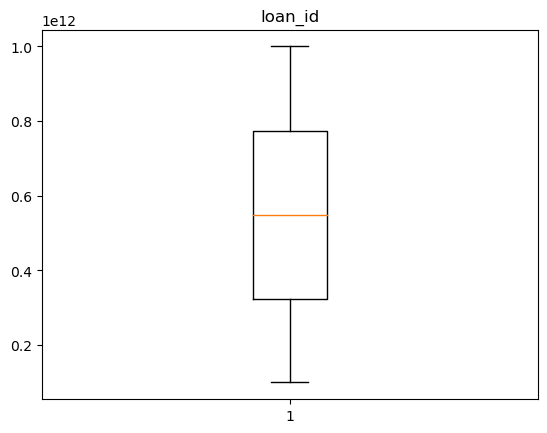

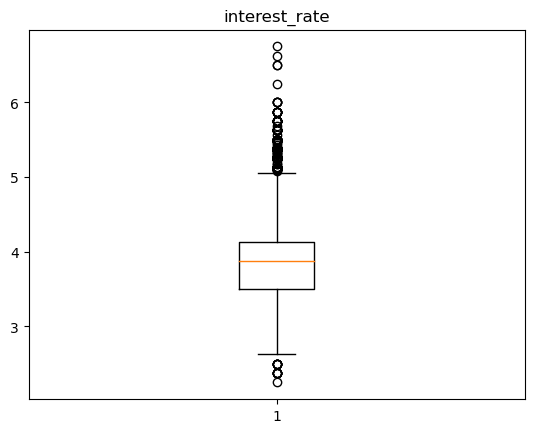

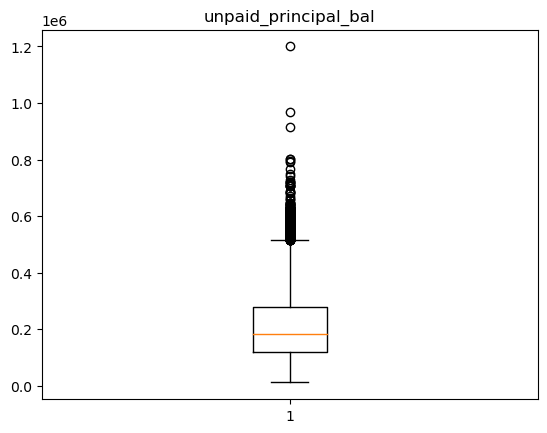

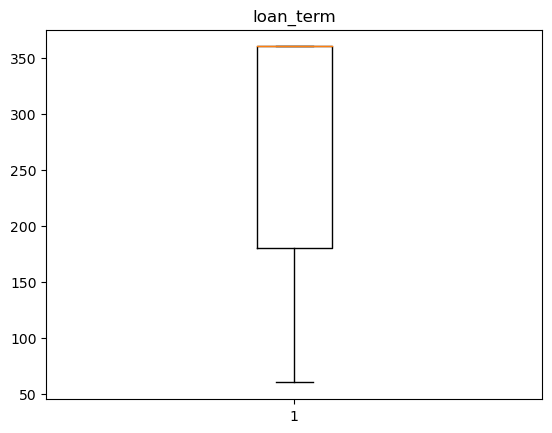

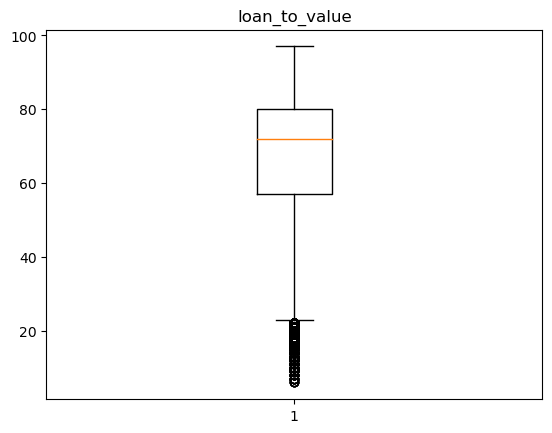

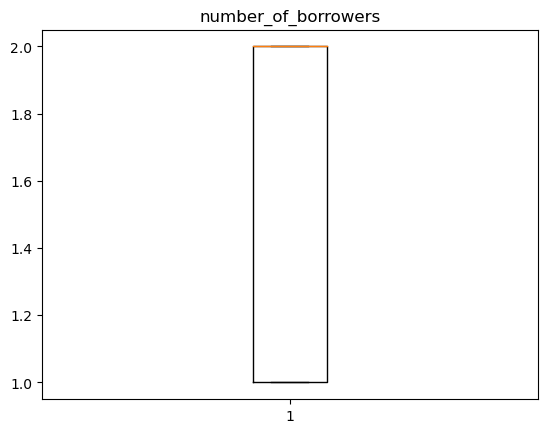

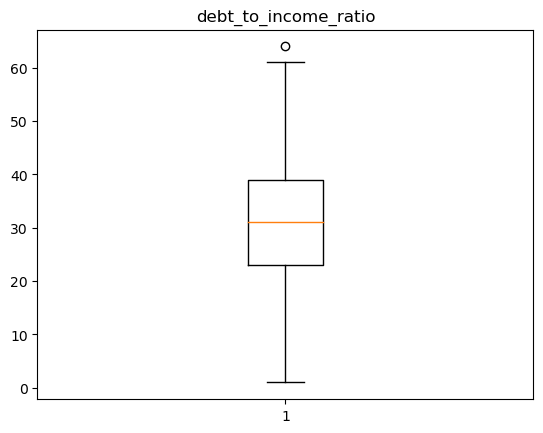

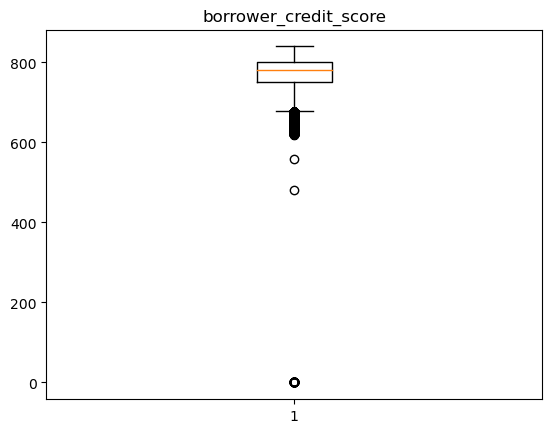

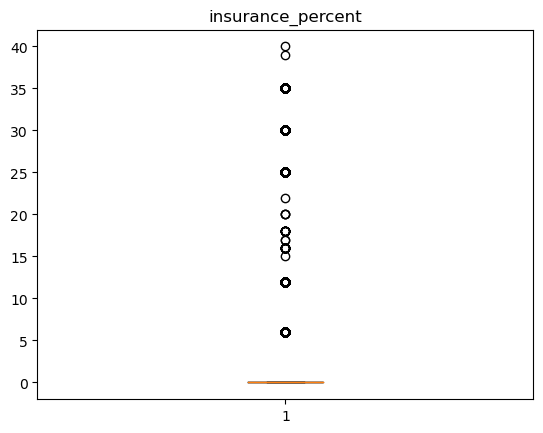

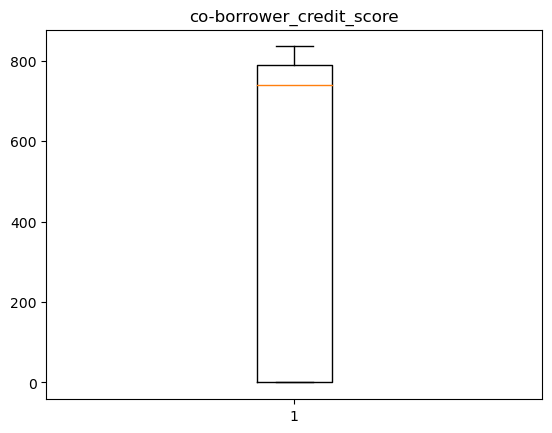

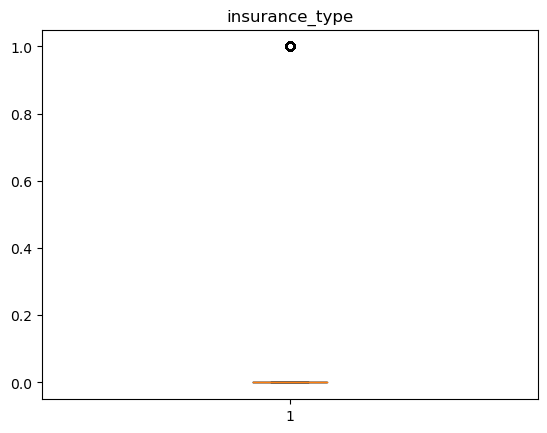

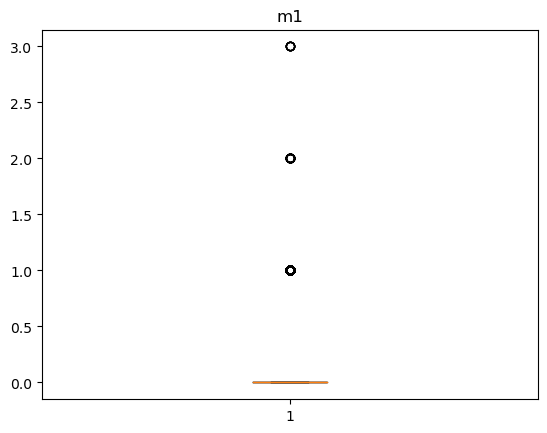

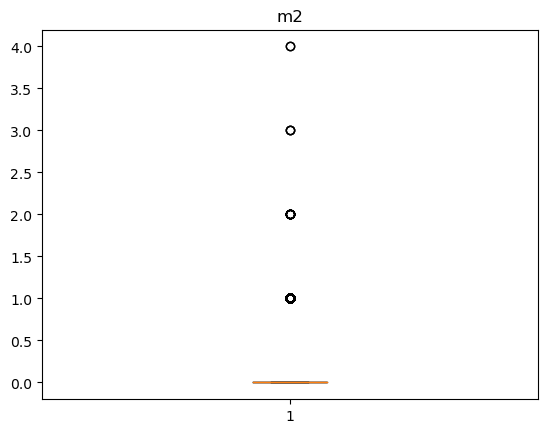

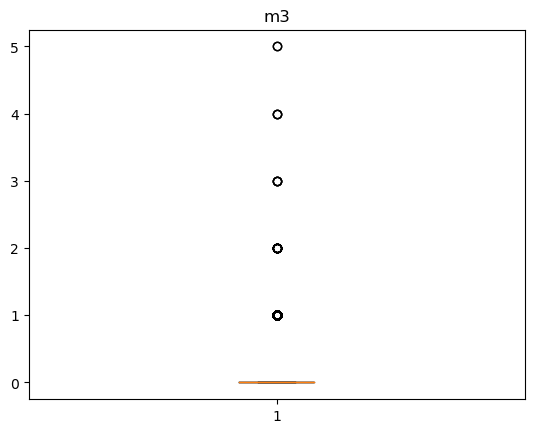

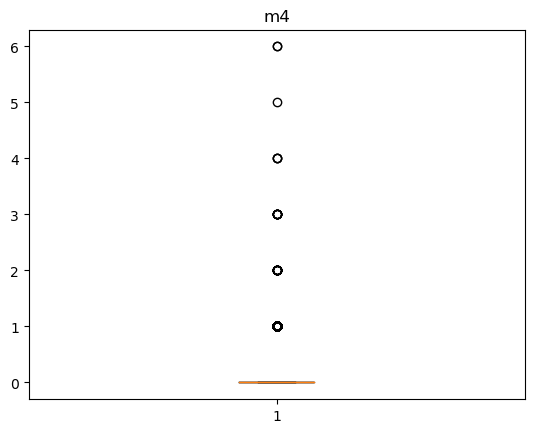

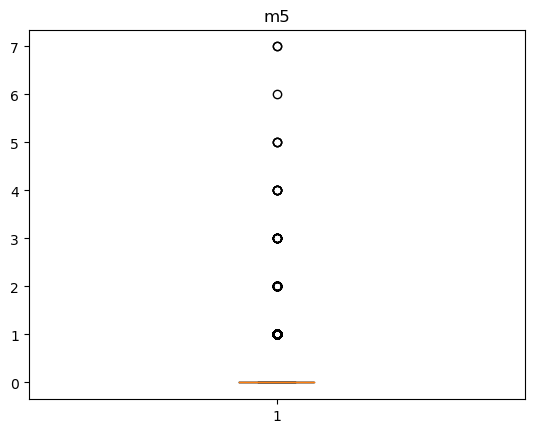

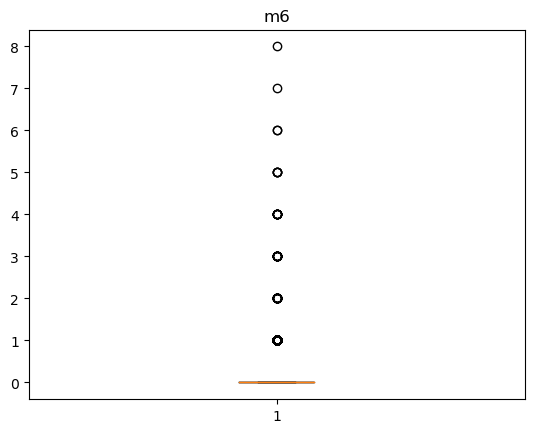

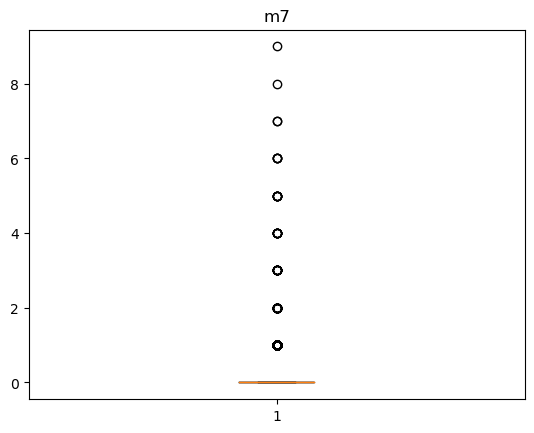

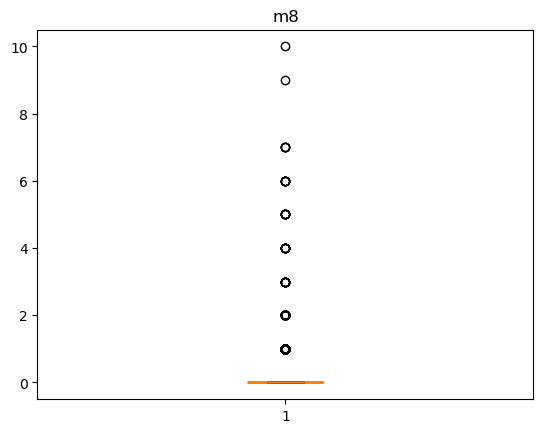

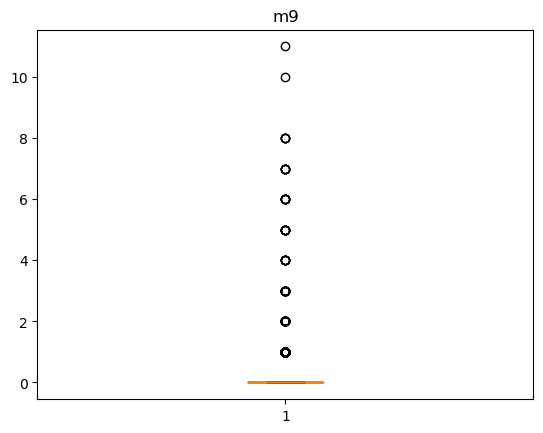

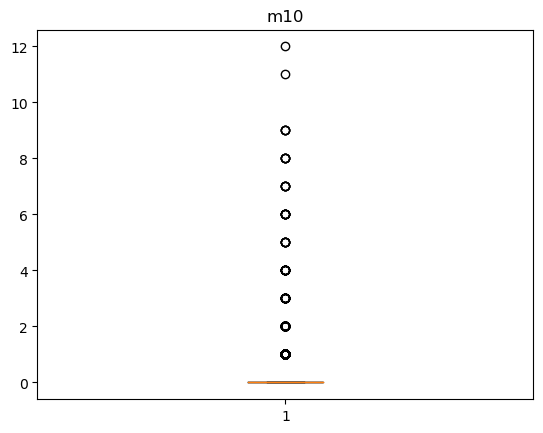

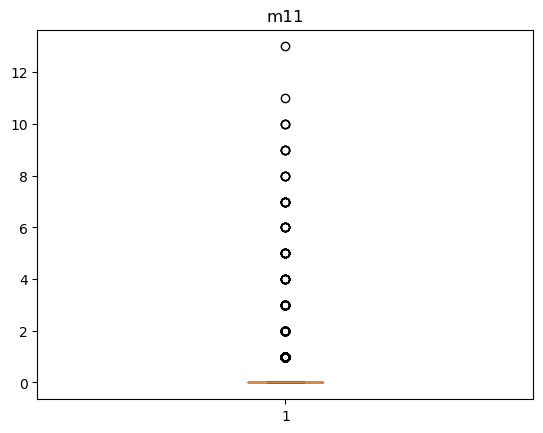

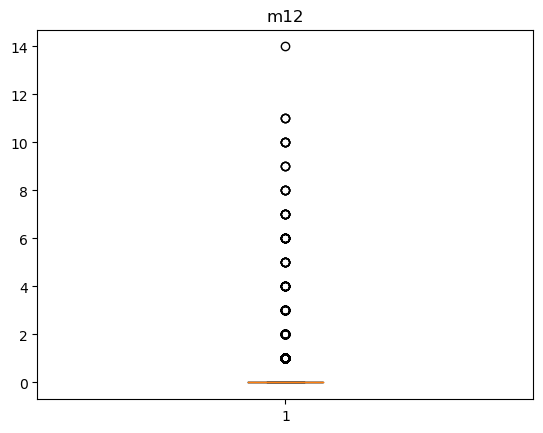

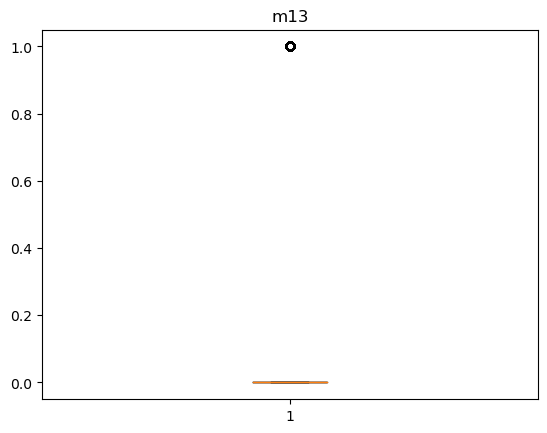

In [14]:
for ca in cols:
    plt.boxplot(data[ca])
    plt.title(ca)
    plt.show()

In [15]:
# Visualization

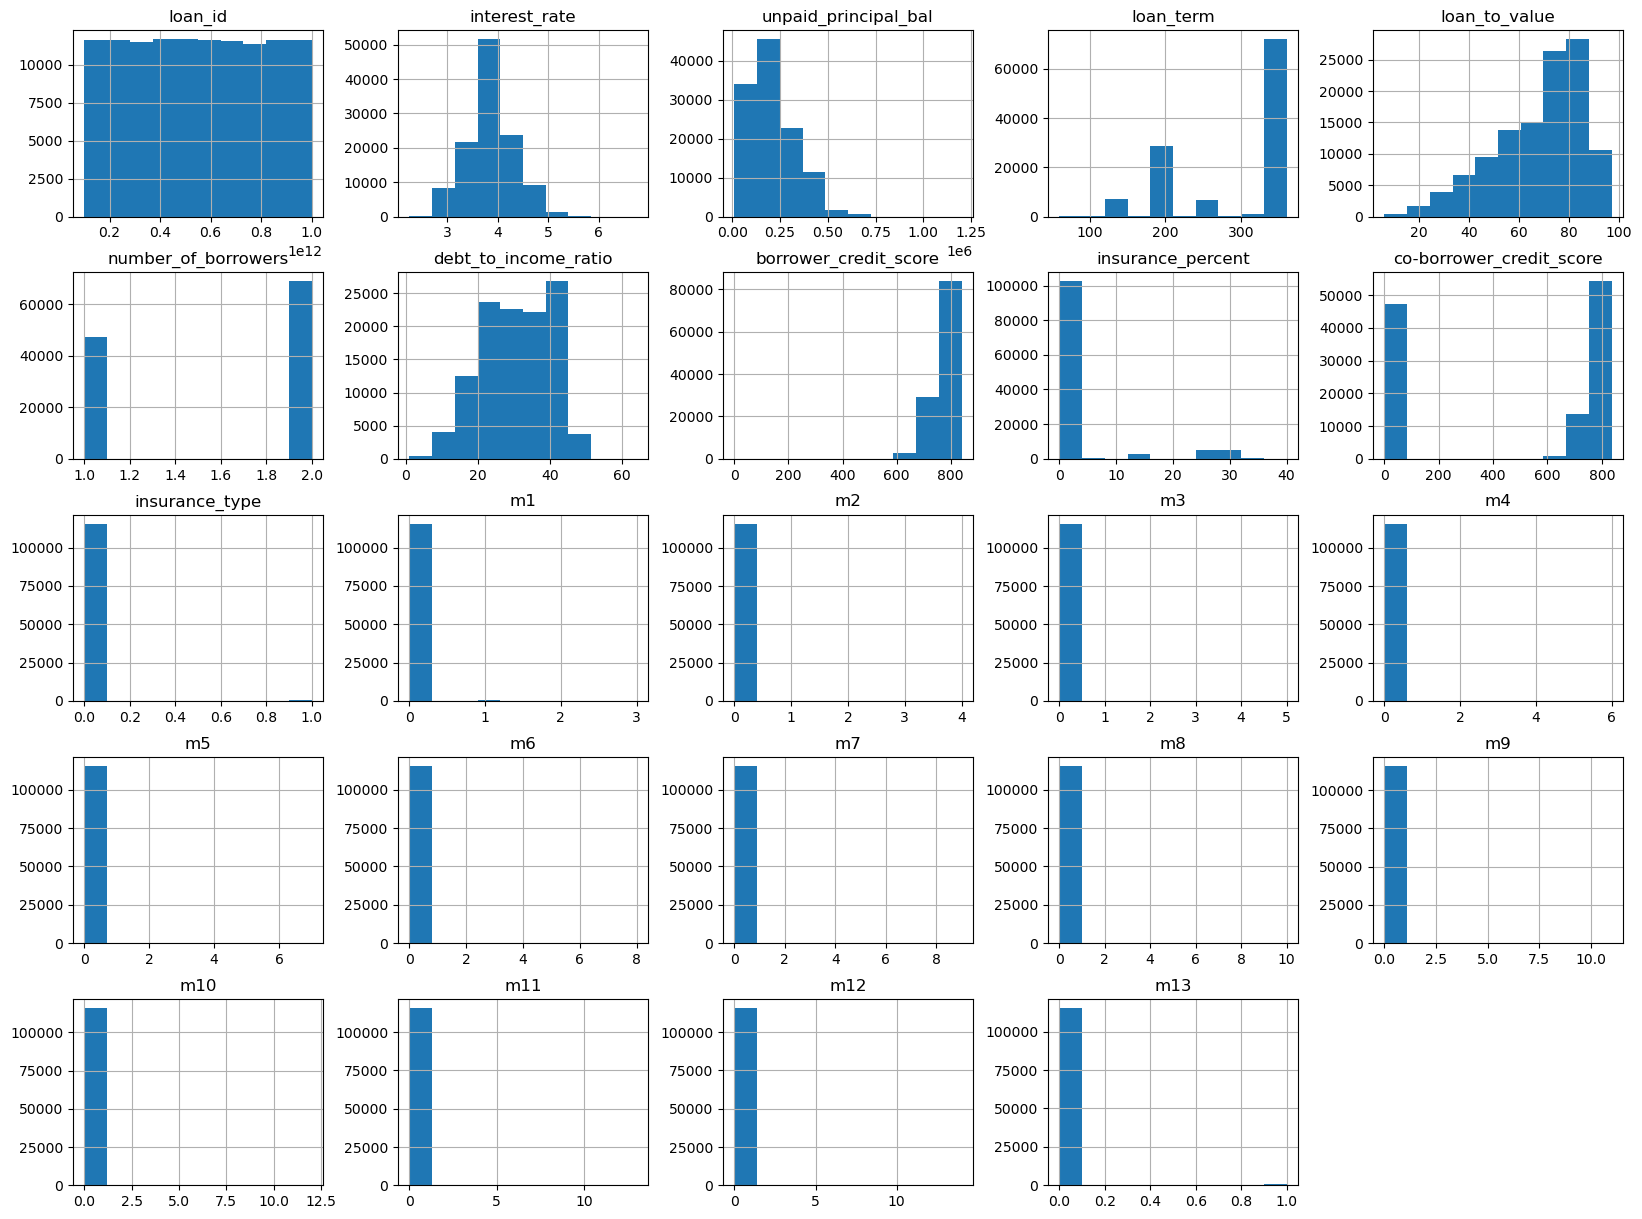

In [16]:
freqgraph=data.select_dtypes(include=['int64','float64','int32'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [17]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [18]:
data['source'].value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [19]:
data['source'].unique()

array(['Z', 'Y', 'X'], dtype=object)

In [20]:
data['financial_institution'].nunique()

19

In [21]:
data['financial_institution'].unique()

array(['Turner, Baldwin and Rhodes', 'Swanson, Newton and Miller',
       'Thornton-Davis', 'OTHER', 'Browning-Hart', 'Richardson Ltd',
       'Edwards-Hoffman', 'Richards-Walters', 'Martinez, Duffy and Bird',
       'Miller, Mcclure and Allen', 'Anderson-Taylor',
       'Taylor, Hunt and Rodriguez', 'Nicholson Group',
       'Cole, Brooks and Vincent', 'Sanchez, Hays and Wilkerson',
       'Sanchez-Robinson', 'Suarez Inc', 'Romero, Woods and Johnson',
       'Chapman-Mcmahon'], dtype=object)

In [22]:
data['financial_institution'].value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

In [23]:
data['financial_institution'].value_counts(normalize = True) * 100

OTHER                          42.822554
Browning-Hart                  27.444898
Swanson, Newton and Miller      5.922901
Edwards-Hoffman                 4.184976
Martinez, Duffy and Bird        4.062624
Miller, Mcclure and Allen       2.721053
Nicholson Group                 1.823226
Turner, Baldwin and Rhodes      1.590584
Suarez Inc                      1.542332
Cole, Brooks and Vincent        1.414810
Richards-Walters                1.257130
Taylor, Hunt and Rodriguez      1.084802
Sanchez-Robinson                1.027934
Sanchez, Hays and Wilkerson     0.734977
Romero, Woods and Johnson       0.646229
Thornton-Davis                  0.560926
Anderson-Taylor                 0.416171
Richardson Ltd                  0.407555
Chapman-Mcmahon                 0.334316
Name: financial_institution, dtype: float64

In [24]:
data['interest_rate'].describe()

count    116058.000000
mean          3.868961
std           0.461020
min           2.250000
25%           3.500000
50%           3.875000
75%           4.125000
max           6.750000
Name: interest_rate, dtype: float64

In [25]:
data.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [26]:
data['unpaid_principal_bal'].describe().round()

count     116058.0
mean      208226.0
std       114685.0
min        11000.0
25%       120000.0
50%       183000.0
75%       278000.0
max      1200000.0
Name: unpaid_principal_bal, dtype: float64

In [27]:
data[data['unpaid_principal_bal']>1000000].index

Int64Index([84135], dtype='int64')

In [28]:
data=data.drop(84135)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116057 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116057 non-null  int64  
 1   source                    116057 non-null  object 
 2   financial_institution     116057 non-null  object 
 3   interest_rate             116057 non-null  float64
 4   unpaid_principal_bal      116057 non-null  int64  
 5   loan_term                 116057 non-null  int64  
 6   origination_date          116057 non-null  object 
 7   first_payment_date        116057 non-null  object 
 8   loan_to_value             116057 non-null  int64  
 9   number_of_borrowers       116057 non-null  float64
 10  debt_to_income_ratio      116057 non-null  float64
 11  borrower_credit_score     116057 non-null  float64
 12  loan_purpose              116057 non-null  object 
 13  insurance_percent         116057 non-null  f

In [30]:
data['loan_to_value'].describe()

count    116057.000000
mean         67.432098
std          17.291709
min           6.000000
25%          57.000000
50%          72.000000
75%          80.000000
max          97.000000
Name: loan_to_value, dtype: float64

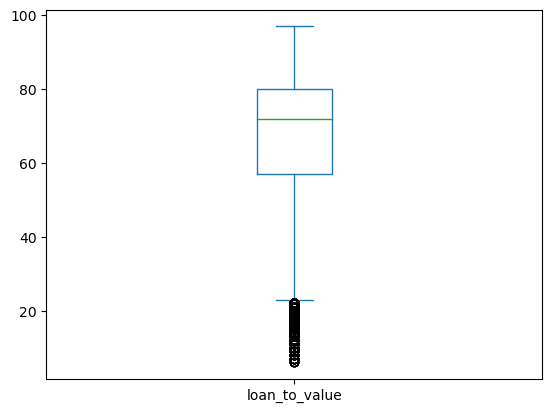

In [31]:
data['loan_to_value'].plot(kind='box')
plt.show()

In [32]:
data[data['loan_to_value']<10]

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
3809,778482838695,X,OTHER,4.375,100000,360,2012-01-01,03/2012,6,2.0,...,0,0,0,0,0,0,0,0,0,0
4578,614948037882,Z,OTHER,3.250,406000,120,2012-02-01,04/2012,7,2.0,...,0,0,0,0,0,0,0,0,0,0
15714,200940357092,X,OTHER,4.250,50000,360,2012-01-01,03/2012,8,2.0,...,0,0,0,0,0,0,0,0,0,0
20306,268945094071,X,"Swanson, Newton and Miller",4.500,37000,360,2012-02-01,04/2012,9,1.0,...,0,0,0,0,0,0,0,0,0,0
22946,350904250957,X,OTHER,3.500,59000,180,2012-01-01,03/2012,8,2.0,...,0,0,0,0,0,0,0,0,0,0
28962,803072393627,X,"Martinez, Duffy and Bird",4.170,188000,360,2012-02-01,04/2012,8,1.0,...,0,0,0,0,0,0,0,0,0,0
36896,893257514209,X,OTHER,3.375,150000,120,2012-01-01,03/2012,9,1.0,...,0,0,0,0,0,0,0,0,0,0
42859,183975731774,X,"Martinez, Duffy and Bird",3.750,164000,180,2012-01-01,03/2012,9,2.0,...,0,0,0,0,0,0,0,0,0,0
45074,204210493070,Y,Edwards-Hoffman,3.990,235000,360,2012-01-01,03/2012,9,2.0,...,0,0,0,0,0,0,0,0,0,0
46479,138522544138,X,Suarez Inc,3.375,206000,180,2012-02-01,04/2012,9,1.0,...,0,0,0,0,0,0,0,0,0,0


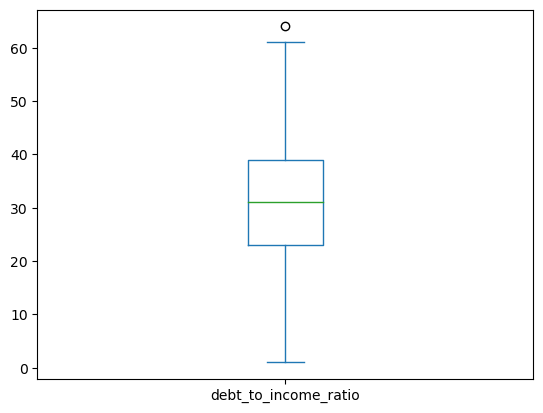

In [33]:
data['debt_to_income_ratio'].plot(kind='box')
plt.show()

In [34]:
data['debt_to_income_ratio'].describe()

count    116057.000000
mean         30.742135
std           9.730692
min           1.000000
25%          23.000000
50%          31.000000
75%          39.000000
max          64.000000
Name: debt_to_income_ratio, dtype: float64

In [35]:
data['borrower_credit_score'].describe()

count    116057.000000
mean        769.926545
std          42.210813
min           0.000000
25%         751.000000
50%         782.000000
75%         800.000000
max         840.000000
Name: borrower_credit_score, dtype: float64

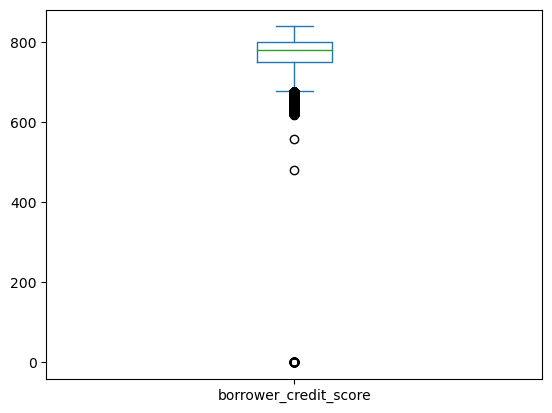

In [36]:
data['borrower_credit_score'].plot(kind='box')
plt.show()

In [37]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [38]:
repay_cols=['number_of_borrowers','m1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13']

In [39]:
zero_credit_index=data[data['borrower_credit_score']<400][repay_cols].index

In [40]:
data=data.drop(zero_credit_index)

In [41]:
data.shape

(116006, 29)

In [42]:
data['loan_purpose'].value_counts(normalize=True)*100

A23    50.391359
B12    25.328000
C86    24.280641
Name: loan_purpose, dtype: float64

In [43]:
data['co-borrower_credit_score'].describe()

count    116006.000000
mean        459.714515
std         381.931527
min           0.000000
25%           0.000000
50%         740.000000
75%         791.000000
max         836.000000
Name: co-borrower_credit_score, dtype: float64

In [44]:
data['insurance_type'].describe()

count    116006.000000
mean          0.003258
std           0.056990
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: insurance_type, dtype: float64

In [45]:
data['insurance_type'].value_counts()

0.0    115628
1.0       378
Name: insurance_type, dtype: int64

In [46]:
# remove unnecessary ones

In [47]:
data.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [48]:
required_columns=['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term','loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [49]:
x=data[required_columns]

In [50]:
y=data['m13']

In [51]:
y.value_counts(normalize=True)*100

0    99.451752
1     0.548248
Name: m13, dtype: float64

In [52]:
x.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12'],
      dtype='object')

In [53]:
x.shape

(116006, 25)

In [54]:
x=pd.get_dummies(x)

In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116006 entries, 0 to 116057
Data columns (total 47 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   interest_rate                                      116006 non-null  float64
 1   unpaid_principal_bal                               116006 non-null  int64  
 2   loan_term                                          116006 non-null  int64  
 3   loan_to_value                                      116006 non-null  int64  
 4   number_of_borrowers                                116006 non-null  float64
 5   debt_to_income_ratio                               116006 non-null  float64
 6   borrower_credit_score                              116006 non-null  float64
 7   insurance_percent                                  116006 non-null  float64
 8   co-borrower_credit_score                           116006 non-null  float6

In [56]:
x.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,"financial_institution_Sanchez, Hays and Wilkerson",financial_institution_Sanchez-Robinson,financial_institution_Suarez Inc,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
count,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,...,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000,116006.000000
mean,3.868913,208225.496957,292.271331,67.429314,1.593254,30.744539,770.265029,2.786330,459.714515,0.003258,...,0.007353,0.010284,0.015430,0.059256,0.010853,0.005612,0.015913,0.503914,0.253280,0.242806
std,0.460992,114654.925134,89.765255,17.293600,0.491229,9.729575,39.010395,8.096376,381.931527,0.056990,...,0.085435,0.100887,0.123257,0.236103,0.103611,0.074702,0.125139,0.499987,0.434892,0.428781
min,2.250000,11000.000000,60.000000,6.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,120000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,183000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,6.750000,968000.000000,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Feature Engineering

In [58]:
x['total_credit_score']=x['borrower_credit_score']+x['co-borrower_credit_score']

In [59]:
x.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'source_X', 'source_Y', 'source_Z',
       'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Sanchez, Hays and W

In [60]:
x=x.drop(['borrower_credit_score','borrower_credit_score'],axis=1)

In [61]:
repay_columns=['m1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [62]:
x['m_mean']=x[repay_columns].mean(axis=1)

In [63]:
x['m_median']=x[repay_columns].median(axis=1)

In [64]:
x['m_std']=x[repay_columns].std(axis=1)

In [65]:
x['m_skew']=x[repay_columns].skew(axis=1)

In [66]:
x['m_kurtosis']=x[repay_columns].kurtosis(axis=1)

In [67]:
x.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'source_X',
       'source_Y', 'source_Z', 'financial_institution_Anderson-Taylor',
       'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Sanchez, Hays and Wilkerson',
       'financial_ins

In [68]:
# MinMax Scaler

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=345,stratify=y)

In [71]:
mn=MinMaxScaler()
x_train=mn.fit_transform(x_train)
x_test=mn.fit_transform(x_test)
                        

In [72]:
# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)

      

C:\Users\mothe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
from sklearn.metrics import f1_score,precision_score,recall_score, accuracy_score, confusion_matrix

In [76]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy",acc,"\nPrecision Score",prec,"\nRecall score",recall,"\nF1_Score",f1score)

Accuracy 0.9956469269890527 
Precision Score 0.782608695652174 
Recall score 0.28346456692913385 
F1_Score 0.4161849710982659


In [77]:
confusion_matrix(y_test,y_pred)

array([[23065,    10],
       [   91,    36]], dtype=int64)

In [78]:
# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [81]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy",acc,"\nPrecision Score",prec,"\nRecall score",recall,"\nF1_Score",f1score)

Accuracy 0.9950004309973278 
Precision Score 0.72 
Recall score 0.14173228346456693 
F1_Score 0.2368421052631579


In [82]:
confusion_matrix(y_test,y_pred)

array([[23068,     7],
       [  109,    18]], dtype=int64)

In [83]:
# Decision tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dt=DecisionTreeClassifier(max_depth=8)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [86]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy",acc,"\nPrecision Score",prec,"\nRecall score",recall,"\nF1_Score",f1score)

Accuracy 0.9781484354797 
Precision Score 0.08333333333333333 
Recall score 0.2992125984251969 
F1_Score 0.13036020583190394


In [87]:
confusion_matrix(y_test,y_pred)

array([[22657,   418],
       [   89,    38]], dtype=int64)

In [88]:
# Logistic Regression is performing good

In [89]:
# Bagging Classifier

In [90]:
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassifier()
bg=BaggingClassifier(estimator=dt,n_estimators=50)
bg=BaggingClassifier()
bg.fit(x_train,y_train)
y_pred=bg.predict(x_test)

In [91]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy",acc,"\nPrecision Score",prec,"\nRecall score",recall,"\nF1_Score",f1score)

Accuracy 0.9946556331350745 
Precision Score 0.5168539325842697 
Recall score 0.36220472440944884 
F1_Score 0.425925925925926


In [92]:
confusion_matrix(y_test,y_pred)

array([[23032,    43],
       [   81,    46]], dtype=int64)

In [93]:
# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf=RandomForestClassifier(n_estimators=150,max_depth=8,max_features=0.8)

In [96]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, max_features=0.8, n_estimators=150)

In [97]:
y_pred=rf.predict(x_test)

In [98]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy",acc,"\nPrecision Score",prec,"\nRecall score",recall,"\nF1_Score",f1score)

Accuracy 0.9956038272562711 
Precision Score 0.6582278481012658 
Recall score 0.4094488188976378 
F1_Score 0.5048543689320388


In [99]:
confusion_matrix(y_test,y_pred)

array([[23048,    27],
       [   75,    52]], dtype=int64)

In [100]:
# Support Vector machines

In [101]:
from sklearn.svm import SVC

In [102]:
sv_linear=SVC(kernel='linear')
sv_linear.fit(x_train,y_train)
y_pred=sv_linear.predict(x_test)


In [103]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy",acc,"\nPrecision Score",prec,"\nRecall score",recall,"\nF1_Score",f1score)

Accuracy 0.9959055253857426 
Precision Score 0.75 
Recall score 0.3779527559055118 
F1_Score 0.5026178010471204


In [104]:
confusion_matrix(y_test,y_pred)

array([[23059,    16],
       [   79,    48]], dtype=int64)

In [105]:
sv_poly=SVC(kernel='poly',degree=3)
sv_poly.fit(x_train,y_train)
y_pred=sv_poly.predict(x_test)


In [106]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy",acc,"\nPrecision Score",prec,"\nRecall score",recall,"\nF1_Score",f1score)

Accuracy 0.9958193259201793 
Precision Score 0.8260869565217391 
Recall score 0.2992125984251969 
F1_Score 0.4393063583815029


In [107]:
confusion_matrix(y_test,y_pred)

array([[23067,     8],
       [   89,    38]], dtype=int64)

In [108]:
sv_rbf=SVC(kernel='rbf')
sv_rbf.fit(x_train,y_train)
y_pred=sv_rbf.predict(x_test)

In [109]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy",acc,"\nPrecision Score",prec,"\nRecall score",recall,"\nF1_Score",f1score)

Accuracy 0.9959055253857426 
Precision Score 0.9 
Recall score 0.28346456692913385 
F1_Score 0.4311377245508982


In [110]:
confusion_matrix(y_test,y_pred)

array([[23071,     4],
       [   91,    36]], dtype=int64)

In [111]:
# Voting Classifier

In [112]:
from sklearn.ensemble import VotingClassifier

In [113]:
SEED=1

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=SEED,stratify=y)

In [115]:
lr=LogisticRegression(random_state=SEED)
dt=DecisionTreeClassifier(random_state=SEED)
knn=KNeighborsClassifier()


In [116]:
classifiers=[('Logistic Regression',lr),('K Nearest Neighbors',knn),('Classification Tree',dt)]

In [117]:
for clf_name,clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print('{:s}:{:.3f}'.format(clf_name,f1_score(y_test,y_pred)))

    print('{:s}:{:.3f}'.format(clf_name,recall_score(y_test,y_pred)))

Logistic Regression:0.000
Logistic Regression:0.000
K Nearest Neighbors:0.000
K Nearest Neighbors:0.000
Classification Tree:0.339
Classification Tree:0.378


In [118]:
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("Accuracy",acc,"\nPrecision Score",prec,"\nRecall score",recall,"\nF1_Score",f1score)

Accuracy 0.9919403499698302 
Precision Score 0.3076923076923077 
Recall score 0.3779527559055118 
F1_Score 0.3392226148409894


In [119]:
confusion_matrix(y_test,y_pred)

array([[22967,   108],
       [   79,    48]], dtype=int64)

# SVM-Linear and Random Forest is best model since F1score is 0.50